In [1]:


import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


2024-04-15 10:48:19.975860: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 10:48:19.980331: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 10:48:20.026947: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 10:48:20.963965: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
images = []
labels = []

path = '/home/darklord/final_project2/OCR_dataset/data/training_data'

dir_list = os.listdir(path)
for i in dir_list:
    dir = os.path.join(path, i)
    file_list = os.listdir(dir)
    for j in file_list:
        files = os.path.join(dir, j)
        img = cv2.imread(files)
        img = cv2.resize(img, (64,64))
        img = np.array(img, dtype=np.float32)
        img = img/255
        images.append(img)
        labels.append(i)


In [3]:
X = np.array(images)
y = np.array(labels)


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [5]:
from sklearn.utils import shuffle
X_sh, y_sh = shuffle(X, y, random_state=42)


In [6]:
len(X_sh)

20628

In [7]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))


/home/darklord/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-15 10:48:25.219304: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-15 10:48:25.220010: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skip

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=16, epochs=10)


Epoch 1/10


2024-04-15 10:48:25.548772: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 811106304 exceeds 10% of free system memory.


1032/1032 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 0.5748 - loss: 1.5836 - val_accuracy: 0.9292 - val_loss: 0.2505
Epoch 2/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9378 - loss: 0.2067 - val_accuracy: 0.9435 - val_loss: 0.1842
Epoch 3/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9519 - loss: 0.1398 - val_accuracy: 0.9292 - val_loss: 0.2100
Epoch 4/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9641 - loss: 0.1062 - val_accuracy: 0.9380 - val_loss: 0.2192
Epoch 5/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9689 - loss: 0.0879 - val_accuracy: 0.9406 - val_loss: 0.1785
Epoch 6/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9728 - loss: 0.0751 - val_accuracy: 0.9527 - val_loss: 0.1839
Epoch 7/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9768 - loss: 0.0630 - val_accuracy: 0.9544 - val_loss: 0.1788
Epoch 8/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9776 - loss: 0.05

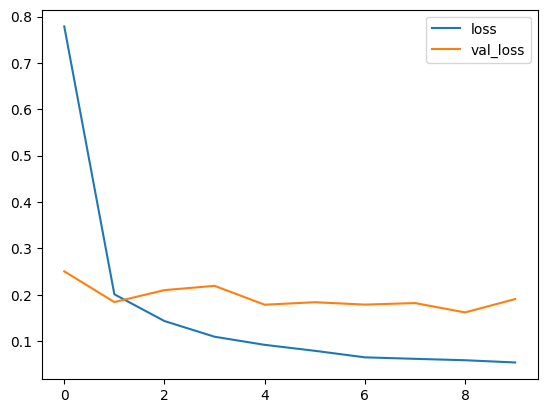

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])


In [11]:
test_images = []
test_labels = []

path = '/home/darklord/final_project2/OCR_dataset/data/testing_data'

dir_list = os.listdir(path)
for i in dir_list:
    dir = os.path.join(path, i)
    file_list = os.listdir(dir)
    for j in file_list:
        files = os.path.join(dir, j)
        img = cv2.imread(files)
        img = cv2.resize(img, (64,64))
        img = np.array(img, dtype=np.float32)
        img = img/255
        test_images.append(img)
        test_labels.append(i)


In [12]:
X_test = np.array(test_images)
y_test = np.array(test_labels)


In [13]:
preds = model.predict(X_test)
predicted_labels = le.inverse_transform(np.argmax(preds, axis=1))


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


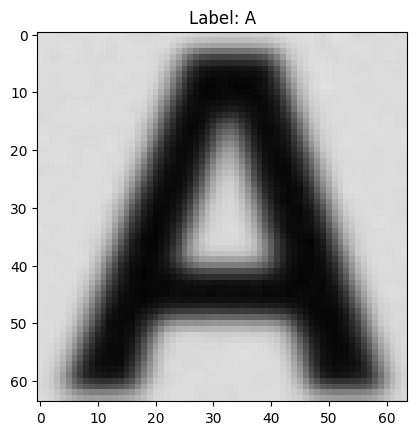

In [14]:
plt.imshow(X_test[197])
plt.title(f"Label: {predicted_labels[197]}")
plt.show()


In [15]:
y_test = le.fit_transform(y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9806 - loss: 0.0439
Test Accuracy: 0.9771825671195984
